In [133]:
from extract import extract
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [134]:
# get data here
experiment_name = 'experiment_5'
rootpath = '/Users/nils/Downloads/results-2'
time_key = 'finish'
data = extract(rootpath)

In [135]:
# the number of nodes that run worker is the key of the dict
max_worker_nodes = len(data[experiment_name].keys())

# !!has to be set manually!!
number_of_rounds = 5

# since we tested 1, 2, 3... nodes
X = np.arange(max_worker_nodes) + 1
# 
finished_all =[]
finished_mean = []
finished_min = []
finished_max = []
# 
#iterate over all worker_nodes
for experiment_number in range(1, max_worker_nodes+1):
    experiment_key = 'node-count-' + str(experiment_number)
    experiment = data[experiment_name][experiment_key]
    round_finished = []
    for round_number in range(0,number_of_rounds+1):
        round_key = 'round-'+ str(round_number)
        if round_key in experiment.keys():
            round = experiment[round_key]
            finished = int(round[time_key])
            round_finished.append(finished)

    finished_all.append(round_finished)
    min_elem = min(round_finished)
    max_elem = max(round_finished)
    finished_min.append(min_elem)
    finished_max.append(max_elem)
    if len(round_finished) >= 3:
        round_finished.remove(max_elem)
        round_finished.remove(min_elem)
    finished_mean.append(np.array(round_finished).mean())



In [141]:
def linear_scaling_plot(Y, save_to, x_min_max = None, y_min_max = None, title=None):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1)
    
    ax.plot(X, Y, '-o', color='tab:blue')
    
    ax.set_xlabel("Number of Nodes")
    ax.set_ylabel("Time in ms")
    ax.yaxis.grid()
    
    if x_min_max:
        ax.set_xlim(x_min_max)
    
    if y_min_max:
        ax.set_ylim(y_min_max)
    
    if title:
        ax.set_title(title)
    
    # display the plot
    plt.show()
    fig.savefig(save_to)

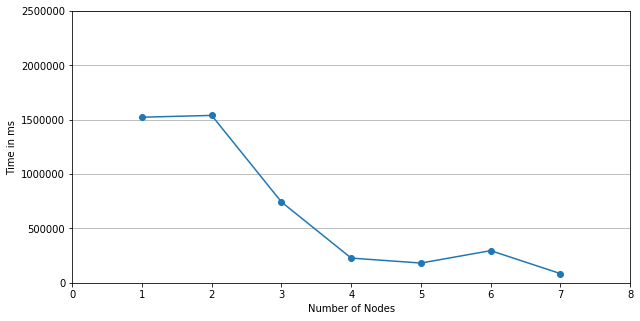

In [142]:
# plot MEAN data
Y = np.array(finished_mean)
linear_scaling_plot(Y, 'linear-scale-mean.pdf', x_min_max=(0,8), y_min_max=(0,2500000))

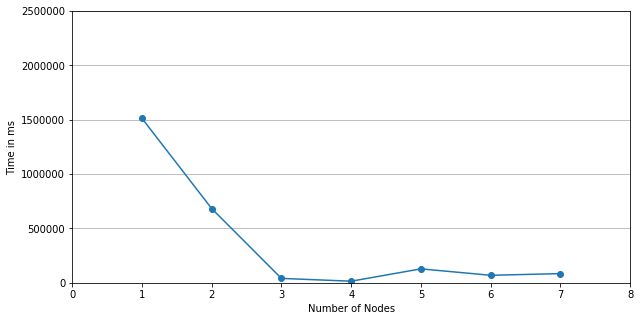

In [143]:
# plot MIN data
Y = np.array(finished_min)
linear_scaling_plot(Y, 'linear-scale-min.pdf', x_min_max=(0,8), y_min_max=(0,2500000))

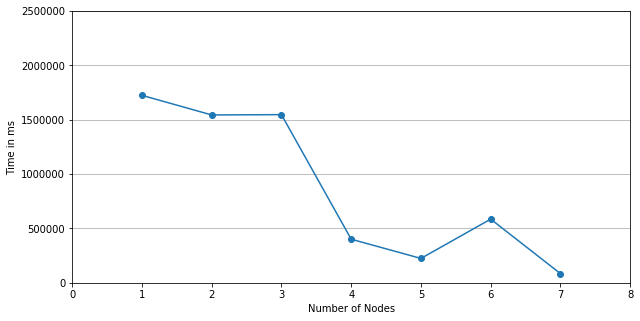

In [144]:
# plot MAX data
Y = np.array(finished_max)
linear_scaling_plot(Y, 'linear-scale-max.pdf', x_min_max=(0,8), y_min_max=(0,2500000))